In [1]:
from typing import Tuple, Any

import matplotlib.pyplot as plt
import numpy as np
import random
import math
import sympy
import time

# TASK 1

In [2]:
def sum_of_digits(n):
    total: int = 0
    while n > 0:
        total += n % 10
        n //= 10
    return total

In [3]:
class Entity:
    def __init__(self, p, alpha, challange, time):
        self.p: int = p
        self.alpha: int = alpha
        self.challange: int = challange
        self.time: float = time


class Prover:
    def __init__(self, id, k):
        self.id: str = id
        self.k: int = k
        self.kPrime = int = pow(alpha, self.k, p)
        self.challange: int = None
        self.rPrime: int = None
        self.r: int = None
        self.t: list = []

    def calculateR(self):
        tempRPrime: int = None
        tempR: int = None

        stop: int = 0
        while (stop == 0):
            tempRPrime = random.randint(0,p-1)
            tempR: int = sum_of_digits(tempRPrime)
            gcd = math.gcd(tempR, p-1)
            if(gcd == 1):
                self.rPrime = tempRPrime
                self.r = tempR
                stop = 1

    def calculateT(self):
        t1 = pow(alpha, self.r, p)
        t2 = ((self.challange - (self.k*t1))* pow(self.r,-1,(p-1))) % (p-1)
        self.t.append(t1)
        self.t.append(t2)


class Verifier:
    def __init__(self):
        self.proverId: str = None
        self.kPrime: int = None
        self.challange: int = None
        self.t: list = None

    def generateChallange(self):
        self.challange = random.randint(0,p-1)

    def calculateS(self):
        s = pow(alpha, self.challange, p)
        sPrime = (pow(self.kPrime,self.t[0]) * pow(self.t[0],self.t[1])) % p

        if(s == sPrime):
            print("Accepted")
            return True
        else:
            print("Rejected")
            return False

In [4]:
def generate_random_primes(lowerBound, upperBound, count):
    primes = []
    while len(primes) < count:
        prime = sympy.randprime(lowerBound, upperBound)
        if prime not in primes:
            primes.append(prime)
    return primes


def handler(signum, frame):
    raise TimeoutError("Timed out!")

def all_primitive_roots(p, max_duration=60):
    if not sympy.isprime(p):
        raise ValueError("This is not a prime number")

    start_time = time.time()  # Record the start time
    phi = p - 1
    factors = sympy.factorint(phi)

    primitive_roots = []

    for g in range(2, p):
        if time.time() - start_time > max_duration:
            print("Returning partial results due to time limit.")
            return primitive_roots

        is_primitive = True
        for q in factors.keys():
            if pow(g, phi // q, p) == 1:
                is_primitive = False
                break
        if is_primitive:
            primitive_roots.append(g)

    return primitive_roots

In [7]:
#Generating 5 primes between 10^3 and 10^7
randomPrimes = generate_random_primes(10**3, 10**7, 5)

values: list = []
ps: list = []
alphas: list = []
challanges: list = []

for prime in randomPrimes:

    #finding primitive roots of the selected prime
    primitive_roots = all_primitive_roots(prime)

    p: int = prime
    alpha: int = random.choice(primitive_roots)

    for i in range(5):

        startTime = time.time()

        A = Prover("A", 123)
        B = Verifier()
        B.kPrime = A.kPrime

        #A sends idA to B
        B.proverId = A.id


        #B generates a random challange
        B.generateChallange()
        #B sends challange to A
        A.challange = B.challange


        #calculation of r and r'
        A.calculateR()
        #calculation of t1 and t2
        A.calculateT()
        #A sends t to B
        B.t = A.t


        #B verifies A
        B.calculateS()

        endTime = time.time()

        v = (endTime-startTime)
        values.append(v)
        ps.append(p)
        alphas.append(alpha)
        challanges.append(A.challange)


Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted
Accepted


p values: [6919963, 6919963, 6919963, 6919963, 6919963]
Alpha values: [3421762, 3421762, 3421762, 3421762, 3421762]
Challenge values: [5337696, 3889310, 5295687, 1529824, 4092287]
Time values: [336.1483187675476, 362.81038546562195, 288.4995422363281, 163.1822953224182, 290.0506341457367], Sum: 1440.6911759376526, Average: 288.13823518753054

p values: [7659541, 7659541, 7659541, 7659541, 7659541]
Alpha values: [6844985, 6844985, 6844985, 6844985, 6844985]
Challenge values: [3093125, 2916316, 5788723, 1663934, 6404270]
Time values: [183.66736125946045, 288.4778196811676, 92.42985892295837, 209.19744539260864, 203.44172883033752], Sum: 977.2142140865326, Average: 195.4428428173065

p values: [1071817, 1071817, 1071817, 1071817, 1071817]
Alpha values: [899278, 899278, 899278, 899278, 899278]
Challenge values: [288848, 340086, 96299, 739196, 827273]
Time values: [20.473797082901, 1.6030044555664062, 7.24007773399353, 3.4280099868774414, 11.542261600494385], Sum: 44.287150859832764, Averag

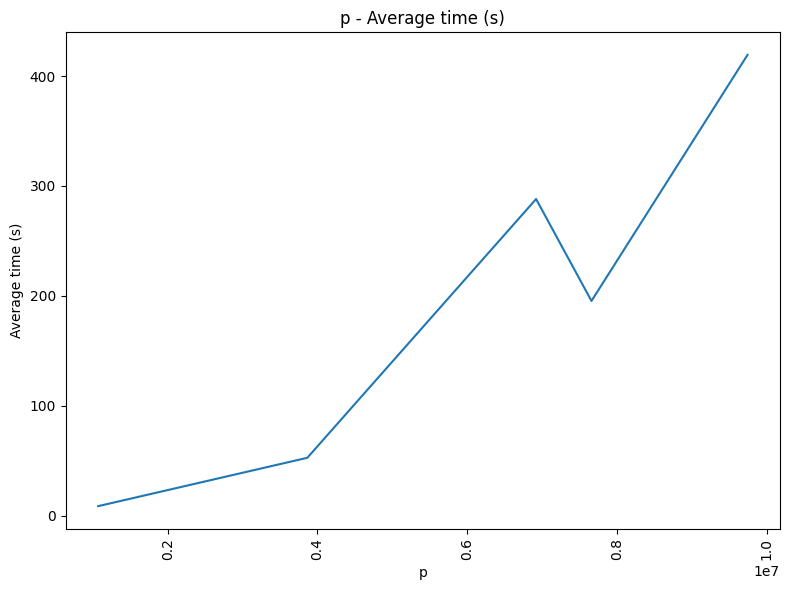

In [63]:
for i in range(0, len(values), 5):
    # Slicing the values to get the current group of 5 elements
    group_values = values[i:i+5]
    group_sum = sum(group_values)
    group_avg = group_sum / 5

    # Slicing the corresponding elements from the other lists
    group_ps = ps[i:i+5]
    group_challenges = challanges[i:i+5]
    group_alphas = alphas[i:i+5]

    # Printing the results
    print(f"p values: {group_ps}")
    print(f"Alpha values: {group_alphas}")
    print(f"Challenge values: {group_challenges}")
    print(f"Time values: {group_values}, Sum: {group_sum}, Average: {group_avg}")
    print()




avg_ps = []
avg_times = []

# Loop through each group of 5 values
for i in range(0, len(values), 5):
    # Calculate the average p value for the current group
    group_ps = ps[i:i+5]
    group_p_sum = sum(group_ps)
    group_p_avg = group_p_sum / 5
    avg_ps.append(group_p_avg)

    # Calculate the average running time for the current group
    group_times = values[i:i+5]
    group_time_sum = sum(group_times)
    group_time_avg = group_time_sum / 5
    avg_times.append(group_time_avg)



#print(avg_ps)
#print(avg_times)
#print()

sorted_pairs = sorted(zip(avg_ps, avg_times))

avg_ps, avg_times = zip(*sorted_pairs)

print(list(avg_ps))
print(list(avg_times))


plt.figure(figsize=(8, 6))
plt.plot(list(avg_ps), list(avg_times))
plt.xlabel('p')
plt.ylabel('Average time (s)')
plt.title('p - Average time (s)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# TASK 2

In [20]:
p = 4047991

c1 = 2379873
t1 = [1199299, 364910]
c2 = 3032252
t2 = [1199299, 2955871]

num = (-t1[1]*c2 + t2[1]*c1) % (p-1)
den = (-t1[1]*t1[0] + t2[1]*t2[0]) % (p-1)

k = (num * pow(den,-1,mod=p-1)) % (p-1)

print(k)

208117


# TASK 3

In [5]:
p=11939
alpha = 21

def r_distribution(p: int) -> list:
    x_axis=[0]*(9*len(str(p)))
    
    for i in range (int(1e5)):
        r_first=np.random.randint(0,p)
    
        r = sum_of_digits(r_first)
        #r=0
    
        #while r_first:
         #   r, r_first = r + r_first % 10, r_first // 10
    
        x_axis[r]+=1
        
    return x_axis

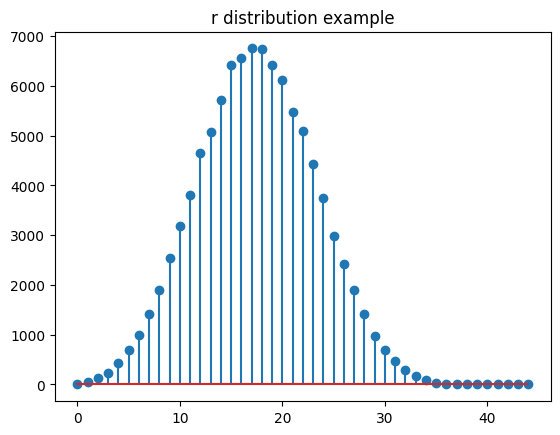

In [6]:
x_axis = r_distribution(p)

plt.stem(x_axis)
plt.title("r distribution example")
plt.show()

*p*, $\alpha$ and the public key *k*, by protocol setup;
* the challenge value *c*;
* the response of the challenge *t*;
* the distribution for value *r* (see above).

## Finding the key and the r
Given the fact that for masquerade as A, the attacker needs to find/guess his private key. According to the information we know the key must be retrieved from the public key or from t2: from the key is computationally expensive (required resolution of the DLP), otherwise inverting the formula of t2 and compute its is lighter, computationally speaking.
$$t_2=(c-kt_1)r^{-1} mod(p-1) \iff k= (c-rt_2)t_1^{-1}\,mod\,(p - 1)$$

In [7]:
#observed protocol
A = Prover("A", 8135)
B = Verifier()
B.kPrime = A.kPrime

#A sends idA to B
B.proverId = A.id


#B generates a random challange
B.generateChallange()
#B sends challange to A
A.challange = B.challange


#calculation of r and r'
A.calculateR()
#calculation of t1 and t2
A.calculateT()
#A sends t to B
B.t = A.t


#B verifies A
B.calculateS()

Accepted


True

In [8]:
observed_t = B.t
observed_challenge = A.challange

print(observed_t, observed_challenge)

[4133, 448] 2017


In [9]:
""""
def find_r(p: int, alpha: int, estimated_t: list) -> int:
    r_dist = np.argsort(r_distribution(p))
    
    for r in r_dist:
        if math.gcd(r, (p - 1)) == 1:
            t1_hat = pow(alpha ,int(r) ,p)
            
            if t1_hat == estimated_t[0]:
                print(f"r = {r} -> t1_hat = {t1_hat}")
                return r
"""     
def find_k(c: int, r: int, t: list, p: int) -> int:
    return ((c - (r * t[1])) * pow(t[0], -1, (p - 1))) % (p - 1)

def resolve_challenge(p: int, alpha: int, key: int, r: int, challenge: int) -> Tuple[int, int]:
    #r = None

    #while r is None or math.gcd(r, (p - 1)) != 1:
     #   r = sum_of_digits(np.random.randint(p))
    
    t1 = pow(alpha, r, p)
    #print(f"c = {challenge}; key = {key}; t1 = {t1}; r = {r}, p = {p}")
    
    t2 = (challenge - (key * t1) * pow(r, -1, (p - 1))) % (p - 1)

    return t1, t2

def masquerade_attack(p: int, alpha: int, r_lst: list, c: int, t: list) -> bool:
    for r in r_lst:
        #compute the corresponding key
        if math.gcd(r, (p - 1)) == 1:
            #try:
            private_key = find_k(c, int(r), t, p)
                    
            print(f"private_key = {private_key}")
            #except ValueError:
            #   return False
            #request a new challenge
            B.generateChallange()
        
            attacker_c = B.challange
            #print(f"attacker_c = {attacker_c}")
                
            t1, t2 = resolve_challenge(p, alpha, private_key, int(r), attacker_c)
                    
            B.t = [t1, t2]
                    
            if B.calculateS():
                return True
    return False
        

In [14]:
iterations = 10000
attempts = np.logspace(math.log(1 + 1, 10), math.log(len(x_axis) + 1, 10), num=20, dtype='int')
probs = []
#private_key_hat = find_k(observed_challenge, find_r(p, alpha, observed_t), observed_t, p)
#private_key_hat = find_k(observed_challenge, find_r(p, alpha, observed_t), observed_t, p)
#print(f"private_key = {private_key_hat}")

In [15]:
for attempt in attempts:
    successes = 0
    
    for i in range(iterations):
        r_lst = np.argsort(r_distribution(p))
      
        success = masquerade_attack(p, alpha, r_lst[-attempt:], observed_challenge, observed_t)
        print(f"{i} -> success: {success}")
        
        if success:
            successes += 1
    probs.append((successes/iterations) * 100)  

0 -> success: False
private_key = 11047
Rejected
1 -> success: False
private_key = 11047
Rejected
2 -> success: False
3 -> success: False
private_key = 11047
Rejected
4 -> success: False
5 -> success: False
6 -> success: False
private_key = 11047
Rejected
7 -> success: False
8 -> success: False
private_key = 11047
Rejected
9 -> success: False
private_key = 11047
Rejected
10 -> success: False
private_key = 11047
Rejected
11 -> success: False
12 -> success: False
13 -> success: False
private_key = 11047
Rejected
14 -> success: False
15 -> success: False
private_key = 11047
Rejected
16 -> success: False
private_key = 11047
Rejected
17 -> success: False
private_key = 11047
Rejected
18 -> success: False
19 -> success: False
private_key = 11047
Rejected
20 -> success: False
21 -> success: False
22 -> success: False
23 -> success: False
private_key = 11047
Rejected
24 -> success: False
25 -> success: False
private_key = 11047
Rejected
26 -> success: False
27 -> success: False
28 -> success: F

In [19]:
for attempt, prob in zip(attempts, probs):
    print(f"success probability w/{attempt} attempts: {prob:.2f}%")

success probability w/1 attempts: 0.00%
success probability w/2 attempts: 0.00%
success probability w/2 attempts: 0.00%
success probability w/3 attempts: 0.00%
success probability w/3 attempts: 0.00%
success probability w/4 attempts: 0.00%
success probability w/5 attempts: 0.00%
success probability w/6 attempts: 0.00%
success probability w/7 attempts: 0.00%
success probability w/8 attempts: 0.20%
success probability w/10 attempts: 0.00%
success probability w/12 attempts: 0.20%
success probability w/14 attempts: 0.20%
success probability w/17 attempts: 0.20%
success probability w/20 attempts: 0.60%
success probability w/23 attempts: 0.40%
success probability w/28 attempts: 0.00%
success probability w/33 attempts: 0.20%
success probability w/39 attempts: 0.40%
success probability w/45 attempts: 0.40%


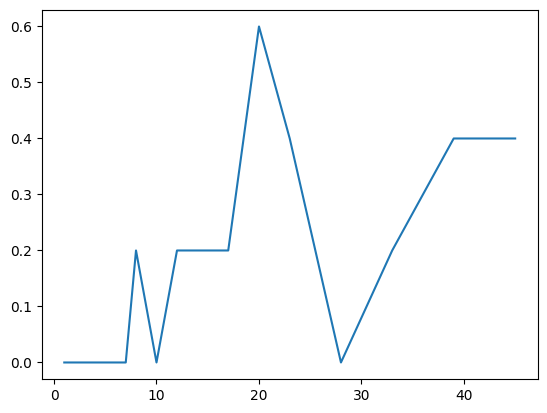

In [18]:
plt.plot(attempts, probs)
plt.show()

The y-axis expresses the probability in percntual.

# TASK 4

In [60]:
def baby_steps_giant_steps(a,b,p):
    #Compute the upperbound as sqrt(p)+1 since we are looking all the possible exponents
    N = 1 + int(math.sqrt(p))

    #Baby steps
    baby_steps = {}
    baby_step = 1
    for r in range(N+1):
        baby_steps[baby_step] = r
        baby_step = baby_step * a % p

    #Giant steps
    giant_stride = pow(a,(p-2)*N,p)
    giant_step = b
    #Now we look for matches
    for q in range(N+1):
        if giant_step in baby_steps:
            return q*N + baby_steps[giant_step]
        else:
            giant_step = giant_step * giant_stride % p
    return "No Match"

#Import the public values:
p = 4047991
alpha = 5     
k_first = 2550534
c = 5241040

#To compute k we have to solve the discrete log using baby-step giant-step
k=baby_steps_giant_steps(alpha,k_first,p)

#Now we chose at random n
n = np.random.randint(0,p)
u=c+n

#Now generate r_first and compute r
r=p-1
while(np.gcd(r,p-1)!=1):
    r_first = np.random.randint(0,p)
    r=0
    while r_first:
       r, r_first = r + r_first % 10, r_first // 10

#Compute t1 and t2
t1=pow(alpha,r,p)
t2= ((u-k*t1)*pow(r,-1,p-1)) % (p-1)

print(f"The forged message is: ( {n}, {t1}, {t2})")

The forged message is: ( 2215104, 106701, 262532)
